In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('train.csv')
data = data.drop(['ID_code','target'],axis=1)




In [5]:
# #converting categorical data to numerical data
# def binaryType_(data):
    
#     data.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
#     data.default.replace(('yes','no'),(1,0),inplace=True)
#     data.housing.replace(('yes','no'),(1,0),inplace=True)
#     data.loan.replace(('yes','no'),(1,0),inplace=True)
#     #data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
#     data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
#     data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    
#     return data

# data = binaryType_(data)


In [5]:
data.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [2]:
# plt.hist((data.duration),bins=100)
# plt.show()

In [3]:
# plt.hist(data.age,bins=10)
# plt.show()

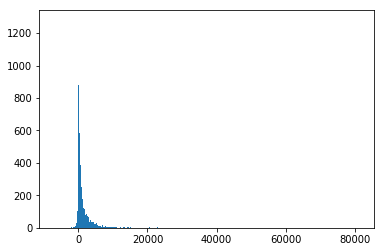

In [11]:

plt.hist(data.balance,bins=1000)
plt.show()

In [24]:
#All the Histogram suggest that data is skewed towards left i.e. existence of skewness
#Feature engineering, bucketing
#We can convert the duration from Seconds to Minutes and then making it as categorical feature, adding 3 columns
#Converting the age of the person into categorical feature by segregating the age as Adult , Middle Aged and old, adding 3 columns
#encoding campaign, no clumn added
#converting p_days,2 columns plus encoding
#"previous", 2 columns added
#balance column into 3 new buckets
#encoding jobs into numerical data
#bucketing maritial status
#bucketing education

In [13]:
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    #data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elderly'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

In [14]:
def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data


In [15]:
def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data


In [16]:
def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data


In [17]:
def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data



In [18]:
def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data



In [19]:
def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data


In [20]:
def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data


In [21]:
def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data


In [22]:
data = campaign_(data)
data = age_(data)
data = education_(data)
data = balance_(data)
data = job_(data)
data = previous_(data)
data = duration_(data)
data = pdays_(data)
data = marital_(data)
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary',
       'tertiary', 'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance',
       'Not_Contacted', 'Contacted', 't_min', 't_e_min', 'e_min',
       'pdays_not_contacted', 'months_passed', 'married', 'singles',
       'divorced'],
      dtype='object')


In [23]:
print(data)

       age  job   marital  education  default  balance  housing  loan  \
0       59    6   married  secondary        0     2343        1     0   
1       56    6   married  secondary        0       45        0     0   
2       41    2   married  secondary        0     1270        1     0   
3       55    7   married  secondary        0     2476        1     0   
4       54    6   married   tertiary        0      184        0     0   
5       42    1    single   tertiary        0        0        1     1   
6       56    1   married   tertiary        0      830        1     1   
7       60    5  divorced  secondary        0      545        1     0   
8       37    2   married  secondary        0        1        1     0   
9       28    7    single  secondary        0     5090        1     0   
10      38    6    single  secondary        0      100        1     0   
11      30    4   married  secondary        0      309        1     0   
12      29    1   married   tertiary        0      

In [27]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Neural Network':MLPClassifier(),'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}

In [28]:
data_y = pd.DataFrame(data['target'])
data_X = data.drop(['deposit','balance','previous','pdays','age','duration','education','marital'],axis=1)
print(data_X.columns)
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
#metrics_cols = []
log = pd.DataFrame(columns=log_cols)


Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign',
       'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')


In [29]:
print(data_X)

       job  default  housing  loan  contact  month  campaign  Adult  \
0        6        0        1     0        3      5         1      0   
1        6        0        0     0        3      5         1      0   
2        2        0        1     0        3      5         1      0   
3        7        0        1     0        3      5         1      0   
4        6        0        0     0        3      5         2      0   
5        1        0        1     1        3      5         2      0   
6        1        0        1     1        3      5         1      0   
7        5        0        1     0        3      5         1      0   
8        2        0        1     0        3      5         1      0   
9        7        0        1     0        3      5         2      1   
10       6        0        1     0        3      5         1      0   
11       4        0        1     0        3      5         2      1   
12       1        0        1     1        3      5         3      1   
13    

In [30]:
print(data_y)

       deposit
0            1
1            1
2            1
3            1
4            1
5            1
6            1
7            1
8            1
9            1
10           1
11           1
12           1
13           1
14           1
15           1
16           1
17           1
18           1
19           1
20           1
21           1
22           1
23           1
24           1
25           1
26           1
27           1
28           1
29           1
...        ...
11132        0
11133        0
11134        0
11135        0
11136        0
11137        0
11138        0
11139        0
11140        0
11141        0
11142        0
11143        0
11144        0
11145        0
11146        0
11147        0
11148        0
11149        0
11150        0
11151        0
11152        0
11153        0
11154        0
11155        0
11156        0
11157        0
11158        0
11159        0
11160        0
11161        0

[11162 rows x 1 columns]


                     Classifier  Accuracy  Precision Score  Recall Score  \
0  Gradient Boosting Classifier  0.720555         0.724479      0.715833   
0  Gradient Boosting Classifier  0.722794         0.726876      0.718055   
0  Adaptive Boosting Classifier  0.704433         0.704962      0.701173   
0  Adaptive Boosting Classifier  0.703986         0.704727      0.700559   
0                Neural Network  0.670399         0.675562      0.673821   
0                Neural Network  0.697268         0.700090      0.692529   
0           Logistic Regression  0.674429         0.674377      0.671015   
0           Logistic Regression  0.683386         0.683928      0.679667   
0      Random Forest Classifier  0.669055         0.668503      0.666097   
0      Random Forest Classifier  0.667712         0.666779      0.665479   
0           K Nearest Neighbour  0.682938         0.691008      0.675947   
0           K Nearest Neighbour  0.671742         0.680795      0.664133   
0  Gradient 

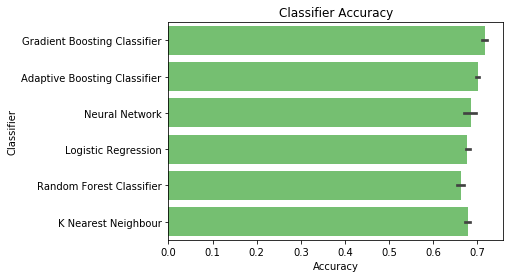

In [32]:
import warnings
warnings.filterwarnings('ignore')
rs = ShuffleSplit(n_splits=1, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
        
        log = log.append(log_entry)
        #metric = metric.append(metric_entry)
    
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()